<a href="https://colab.research.google.com/github/Hbnyoni/CHEAQI-Dynamic-Indicators/blob/main/Dynamic_Indicators_CHEAQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geehydro
!pip install rioxarray
!apt install gdal-bin python3-gdal
!pip install fiona
!pip install rasterio
!pip install geopandas
!pip install folium
!pip install geemap
!pip install cartopy
!pip install mapclassify

  Preparing metadata (setup.py) ... done
  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10124 sha256=98c4baa7b09ccf9c8a9777339bcc212de93342e6dd2664d8de04e55cc5b46c30
  Stored in directory: /root/.cache/pip/wheels/90/ad/c9/ab38b841cd7f4dc8070c1ceb90810f6b7228daa3a4081f4880
Successfully built geehydro
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 77.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubu

In [ ]:
import folium, cartopy, mapclassify
import os
import geopandas as gpd
import numpy as np, pandas as pd
import ee
import geemap
from datetime import datetime

In [ ]:
# Authenticate and initialize Earth Engine API
try:
    ee.Initialize(project='ee-cheaqi')
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

In [ ]:
# Check if notebook is running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
   IN_COLAB = False

In [ ]:
if IN_COLAB:
    # Use the token from Github to clone the PRECISE repository with read/write access
    from IPython.display import clear_output; user="Hbnyoni"; token=input();
    !git clone https://github.com/Hbnyoni/dynamic_indicators.git

    clear_output()

  district      admin_post      locality         name  neighborhood_code  \
0  MANHIÇA  3 DE FEVEREIRO       Taninga    4º Bairro             258018   
1  MANHIÇA         MALUANA  Maluana_sede       Pafene             258115   
2   MAGUDE          MAGUDE      CHICHUCO      Chicuco             258058   
3   MAGUDE          MAGUDE      MATCHABE  Bairro 2000             258031   
4   MAGUDE          MAGUDE    MAGUIGUANE      Bangane             258048   

                                            geometry  
0  MULTIPOLYGON (((32.84430 -25.16290, 32.84846 -...  
1  MULTIPOLYGON (((32.65184 -25.54759, 32.65305 -...  
2  MULTIPOLYGON (((32.64127 -25.11344, 32.64141 -...  
3  MULTIPOLYGON (((32.67021 -25.01076, 32.66487 -...  
4  MULTIPOLYGON (((32.73317 -24.90993, 32.72411 -...  


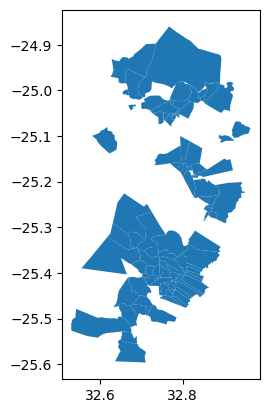

In [ ]:
import geopandas as gpd
import requests
from io import BytesIO

# GitHub raw URL for the GeoPackage
url = 'https://github.com/Hbnyoni/dynamic_indicators/raw/main/shapefiles1/precise_villages.gpkg'

# Download the file using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the file using geopandas from the bytes content
    with BytesIO(response.content) as f:
        gdf = gpd.read_file(f, layer='Mozambique')

    # Plot the geodataframe
    gdf.plot()
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Print the attribute table
print(gdf.head())

  district      admin_post      locality         name  neighborhood_code  \
0  MANHIÇA  3 DE FEVEREIRO       Taninga    4º Bairro             258018   
1  MANHIÇA         MALUANA  Maluana_sede       Pafene             258115   
2   MAGUDE          MAGUDE      CHICHUCO      Chicuco             258058   
3   MAGUDE          MAGUDE      MATCHABE  Bairro 2000             258031   
4   MAGUDE          MAGUDE    MAGUIGUANE      Bangane             258048   

                                            geometry  
0  MULTIPOLYGON (((32.84430 -25.16290, 32.84846 -...  
1  MULTIPOLYGON (((32.65184 -25.54759, 32.65305 -...  
2  MULTIPOLYGON (((32.64127 -25.11344, 32.64141 -...  
3  MULTIPOLYGON (((32.67021 -25.01076, 32.66487 -...  
4  MULTIPOLYGON (((32.73317 -24.90993, 32.72411 -...  


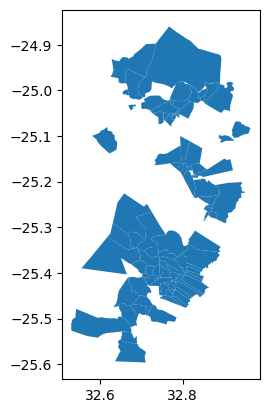

In [ ]:
import geemap
import ee
import pandas as pd
from datetime import datetime

# Initialize the Earth Engine API
ee.Initialize()

# GitHub raw URL for the GeoPackage
url = 'https://github.com/Hbnyoni/dynamic_indicators/raw/main/shapefiles1/precise_villages.gpkg'

# Download the file using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the file using geopandas from the bytes content
    with BytesIO(response.content) as f:
        gdf = gpd.read_file(f, layer='Mozambique')

    # Plot the geodataframe
    gdf.plot()
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Print the attribute table
print(gdf.head())



In [ ]:
!pip install pyreadr
import geemap
import ee
import pandas as pd
from datetime import datetime
import pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.0/417.0 kB 6.8 MB/s eta 0:00:00


In [ ]:
# Initialize the Earth Engine API
ee.Initialize()



Bounding box - minx: 39.079134633356716, miny: -4.335287338839578, maxx: 39.75067503902187, maxy: -3.7066805514662065
    Image Date      NDVI        LST
0   2022-01-10  0.622395  37.186920
1   2022-01-26  0.511255  29.724912
2   2022-02-11  0.448588  37.237193
3   2022-03-15  0.314973  45.874938
4   2022-03-31  0.319592  40.729917
5   2022-04-16       NaN        NaN
6   2022-05-02  0.263518   7.194291
7   2022-05-18  0.417398  38.103825
8   2022-06-03  0.518082  29.881836
9   2022-06-19  0.333915   4.825701
10  2022-07-05  0.568129  24.204285
11  2022-07-21  0.706551  22.958309
12  2022-08-06  0.587993  32.117254
13  2022-08-22  0.561644  33.181990
14  2022-09-07  0.497396  34.728227
15  2022-09-23  0.487719  35.126262
16  2022-10-09  0.345569  33.138818
17  2022-10-25  0.357796  43.266066
18  2022-11-10  0.405223  37.309159
19  2022-11-26  0.440663  36.212029
20  2022-12-12  0.419114  31.366366
21  2022-12-28  0.391581  37.828728
22  2023-01-13  0.380870  36.641320
23  2023-01-29  0.

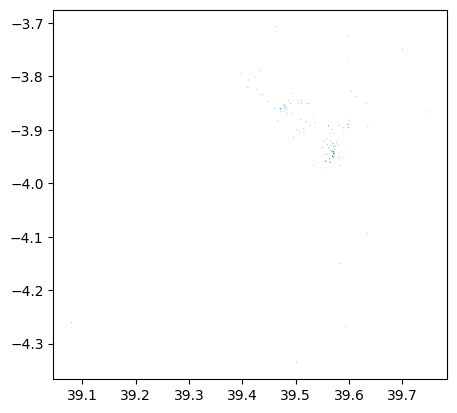

In [ ]:
# Import necessary modules
import requests
from io import BytesIO
import geopandas as gpd
import ee
import pandas as pd
from datetime import datetime
import geemap

# GitHub raw URL for the GeoPackage
url = 'https://github.com/Hbnyoni/dynamic_indicators/raw/main/shapefiles1/precise_villages.gpkg'

# Download the file using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the file using geopandas from the bytes content
    with BytesIO(response.content) as f:
        gdf = gpd.read_file(f, layer='kenya')

    # Plot the geodataframe
    gdf.plot()
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Initialize the Earth Engine API
ee.Initialize()

# Function to generate image collection with NDVI and LST calculation
def generateImageCollection(gdf, start_date, end_date):
    # Get the bounding box of the geodataframe
    minx, miny, maxx, maxy = gdf.total_bounds
    print(f"Bounding box - minx: {minx}, miny: {miny}, maxx: {maxx}, maxy: {maxy}")

    # Convert the bounding box to ee.Geometry
    roi = ee.Geometry.Rectangle([minx, miny, maxx, maxy])

    # Function to mask clouds
    def mask_clouds(image):
        qaBand = image.select('QA_PIXEL')
        cloudBitMask = 1 << 5
        cloudShadowBitMask = 1 << 3
        mask = (qaBand.bitwiseAnd(cloudBitMask).eq(0)
                .And(qaBand.bitwiseAnd(cloudShadowBitMask).eq(0)))
        return (image.updateMask(mask)
                .select('SR_B.*', 'ST_B10')
                .copyProperties(image, ["system:time_start"]))

    # Function to scale image
    def scale_image(image):
        opticalBands = image.select('SR_B.*').multiply(0.0000275).add(-0.2)
        thermalBand = image.select('ST_B10').multiply(0.00341802).add(149.0).subtract(273.15).rename('lst')
        return (image.addBands(opticalBands, None, True)
                .addBands(thermalBand, None, True))

    # Function to calculate NDVI
    def calculate_ndvi(image):
        ndvi = image.normalizedDifference(['SR_B5', 'SR_B4']).rename('ndvi')
        return image.addBands(ndvi)

    # Create the image collection using Landsat 8 Collection 2 Level-2
    collection = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
                  .filterBounds(roi)
                  .filterDate(start_date, end_date)
                  .map(mask_clouds)
                  .map(scale_image)
                  .map(calculate_ndvi))

    return collection.select(['ndvi', 'lst']), roi

# Function to calculate NDVI for each image
def calculate_ndvi_for_images(ndvi_collection, roi):
    # Map over the collection to compute mean NDVI for each image
    def compute_ndvi_info(image):
        mean_ndvi = image.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=30,
            maxPixels=1e9
        )
        # Get the date as a formatted string
        date = image.date().format('YYYY-MM-dd')
        return ee.Feature(None, {
            'date': date,
            'ndvi': mean_ndvi.get('ndvi'),
            'lst': mean_ndvi.get('lst')
        })

    # Apply the function over the collection and get the results as a list of dictionaries
    ndvi_fc = ndvi_collection.map(compute_ndvi_info).getInfo()

    # Convert the list of dictionaries to a pandas DataFrame
    ndvi_data = [{'Image Date': feature['properties']['date'],
                  'NDVI': feature['properties']['ndvi'],
                  'LST': feature['properties']['lst']}
                 for feature in ndvi_fc['features']]

    return pd.DataFrame(ndvi_data)

# Main script execution
# Define the study period
start_date = '2022-01-01'
end_date = '2023-01-31'

# Generate the image collection and region of interest
ndvi_collection, roi = generateImageCollection(gdf, start_date, end_date)

# Calculate NDVI values for each image
ndvi_df = calculate_ndvi_for_images(ndvi_collection, roi)

# Display the NDVI data
print(ndvi_df)


In [ ]:
# Import necessary modules
import pandas as pd
import pyreadr  # For reading RDS files

# Define the path to the RDS file
input_rds_path = '/content/dynamic_indicators/outdoor_data.rds'  # Replace with the actual RDS file path

# Define the list of dates to filter
filter_dates = [
    "10/1/2022", "26/1/2022", "11/2/2022", "15/3/2022", "31/3/2022",
    "16/4/2022", "2/5/2022", "18/5/2022", "3/6/2022", "19/6/2022",
    "5/7/2022", "21/7/2022", "6/8/2022", "22/8/2022", "7/9/2022",
    "23/9/2022", "9/10/2022", "25/10/2022", "10/11/2022", "26/11/2022",
    "12/12/2022", "28/12/2022", "13/1/2023", "29/1/2023", "27/2/2022"
]

# Convert the list of dates to datetime objects for comparison (with just the date part)
filter_dates = pd.to_datetime(filter_dates, format='%d/%m/%Y')

# Read the RDS file using pyreadr
result = pyreadr.read_r(input_rds_path)
df = result[None]  # Extract the DataFrame

# Convert the 'date' column to datetime format (including time)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract the date part from the 'date' column for comparison
df['date_only'] = df['date'].dt.normalize()

# Filter the DataFrame to keep only rows with dates in the filter_dates list
filtered_df = df[df['date_only'].isin(filter_dates)]

# Output the filtered data (e.g., save to a new CSV file or print to console)
output_csv_path = '/content/dynamic_indicators/filtered_dates.csv'  # Replace with the desired output CSV file path
filtered_df.to_csv(output_csv_path, index=False)

print(f"Filtered data saved to {output_csv_path}")

Filtered data saved to /content/dynamic_indicators/filtered_dates.csv


In [ ]:
# Import necessary modules
import ee
import datetime

# Initialize the Earth Engine API
ee.Initialize()

# Define the Mozambique region using a bounding box
mozambique_region = ee.Geometry.Rectangle([30.0, -26.0, 41.0, -10.0])  # Approximate bounding box

# Define the specific dates for which to generate NDVI rasters
specific_dates = [
    "10/1/2022", "26/1/2022", "11/2/2022", "15/3/2022", "31/3/2022",
    "16/4/2022", "2/5/2022", "18/5/2022", "3/6/2022", "19/6/2022",
    "5/7/2022", "21/7/2022", "6/8/2022", "22/8/2022", "7/9/2022",
    "23/9/2022", "9/10/2022", "25/10/2022", "10/11/2022", "26/11/2022",
    "12/12/2022", "28/12/2022", "13/1/2023", "29/1/2023", "27/2/2022"
]

# Convert the date format to match Earth Engine's expectations (YYYY-MM-DD)
specific_dates = [datetime.datetime.strptime(date, "%d/%m/%Y").strftime("%Y-%m-%d") for date in specific_dates]

# Function to generate NDVI raster for a specific date
def generate_ndvi_for_date(date_str):
    start_date = ee.Date(date_str)
    end_date = start_date.advance(1, 'day')

    # Filter Landsat 8 image collection by date and region
    collection = (
        ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
        .filterDate(start_date, end_date)
        .filterBounds(mozambique_region)
        .map(lambda image: image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI'))
    )

    # Get the mean NDVI image for the day
    ndvi_image = collection.mean().clip(mozambique_region)

    return ndvi_image

# Generate NDVI rasters for each specific date and display them
for date in specific_dates:
    print(f"Generating NDVI raster for date: {date}")
    ndvi_raster = generate_ndvi_for_date(date)

    # Display the raster in the Earth Engine UI
    # Note: In an actual implementation, you might export these images or visualize them using a library such as folium
    ndvi_raster_url = ndvi_raster.getThumbURL({'min': 0, 'max': 1, 'dimensions': 512})
    print(f"NDVI raster for {date}: {ndvi_raster_url}")


Unique dates with images: ['2022-01-01', '2022-01-03', '2022-01-05', '2022-01-06', '2022-01-08', '2022-01-10', '2022-01-12', '2022-01-13', '2022-01-15', '2022-01-17', '2022-01-19', '2022-01-21', '2022-01-22', '2022-01-24', '2022-01-26', '2022-01-28', '2022-01-29', '2022-01-31', '2022-02-02', '2022-02-04', '2022-02-07', '2022-02-09', '2022-02-11', '2022-02-13', '2022-02-14', '2022-02-16', '2022-02-18', '2022-02-20', '2022-02-22', '2022-02-23', '2022-02-25', '2022-02-27', '2022-03-01', '2022-03-02', '2022-03-04', '2022-03-06', '2022-03-08', '2022-03-10', '2022-03-11', '2022-03-13', '2022-03-15', '2022-03-17', '2022-03-20', '2022-03-22', '2022-03-24', '2022-03-26', '2022-03-27', '2022-03-29', '2022-03-31', '2022-04-02', '2022-04-03', '2022-04-05', '2022-04-07', '2022-04-09', '2022-04-12', '2022-04-14', '2022-04-16', '2022-04-18', '2022-04-19', '2022-04-21', '2022-04-23', '2022-04-25', '2022-04-27', '2022-04-28', '2022-04-30', '2022-05-02', '2022-05-04', '2022-05-05', '2022-05-07', '2022-0

In [ ]:
print(ndvi_df)

    Image Date      NDVI        LST
0   2022-01-10  0.622395  37.186920
1   2022-01-26  0.511255  29.724912
2   2022-02-11  0.448588  37.237193
3   2022-03-15  0.314973  45.874938
4   2022-03-31  0.319592  40.729917
5   2022-04-16       NaN        NaN
6   2022-05-02  0.263518   7.194291
7   2022-05-18  0.417398  38.103825
8   2022-06-03  0.518082  29.881836
9   2022-06-19  0.333915   4.825701
10  2022-07-05  0.568129  24.204285
11  2022-07-21  0.706551  22.958309
12  2022-08-06  0.587993  32.117254
13  2022-08-22  0.561644  33.181990
14  2022-09-07  0.497396  34.728227
15  2022-09-23  0.487719  35.126262
16  2022-10-09  0.345569  33.138818
17  2022-10-25  0.357796  43.266066
18  2022-11-10  0.405223  37.309159
19  2022-11-26  0.440663  36.212029
20  2022-12-12  0.419114  31.366366
21  2022-12-28  0.391581  37.828728
22  2023-01-13  0.380870  36.641320
23  2023-01-29  0.313114  44.824752
24  2022-01-10  0.524650  37.039611
25  2022-01-26  0.434258  28.729710
26  2022-02-11  0.343228  36